<a href="https://colab.research.google.com/github/pup1999/Plateau-Iris-Classification/blob/main/COMBINE_FOLD_MANUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weighting.xlsx to weighting.xlsx


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import loadtxt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow import keras

#1 = P / 0 = NP
# Model configuration
batch_size = 8 # normally 8
no_epochs = 20 #normally150
verbosity = 1

#normally usecols = "A:O"
dataset = pd.read_excel('/content/data 9knn.xlsx',usecols = "A:G",sheet_name = 'ALL') #เลือกอีกที
dataset = shuffle(dataset)

#Prepare data set1

is_set1 = dataset["fold"] == "set1"
set1 = dataset[is_set1]

nameFold1 = set1.iloc[:,0]
#normally("Content1.25Loss(P)","Content1.25Loss(NP)")
X_set1 = set1.loc[:,["c3.4s-1.4(P)(1.25)","c3.4s-1.4(NP)(1.25)","c3.4s-1.4(P)(1.0)","c3.4s-1.4(NP)(1.0)"]]
y_set1 = set1.iloc[:,1]

le = LabelEncoder()
le.fit(y_set1)
y_set1 = le.transform(y_set1)

#Prepare data set2

is_set2 = dataset["fold"] == "set2"
set2 = dataset[is_set2]

nameFold2 = set2.iloc[:,0]

X_set2 = set2.loc[:,["c3.4s-1.4(P)(1.25)","c3.4s-1.4(NP)(1.25)","c3.4s-1.4(P)(1.0)","c3.4s-1.4(NP)(1.0)"]]
y_set2 = set2.iloc[:,1]

le = LabelEncoder()
le.fit(y_set2)
y_set2 = le.transform(y_set2)

#Prepare data set3

is_set3 = dataset["fold"] == "set3"
set3 = dataset[is_set3]

nameFold3 = set3.iloc[:,0]

X_set3 = set3.loc[:,["c3.4s-1.4(P)(1.25)","c3.4s-1.4(NP)(1.25)","c3.4s-1.4(P)(1.0)","c3.4s-1.4(NP)(1.0)"]]
y_set3 = set3.iloc[:,1]

le = LabelEncoder()
le.fit(y_set3)
y_set3 = le.transform(y_set3)

#Prepare data set4

is_set4 = dataset["fold"] == "set4"
set4 = dataset[is_set4]

nameFold4 = set4.iloc[:,0]

X_set4 = set4.loc[:,["c3.4s-1.4(P)(1.25)","c3.4s-1.4(NP)(1.25)","c3.4s-1.4(P)(1.0)","c3.4s-1.4(NP)(1.0)"]]
y_set4 = set4.iloc[:,1]

le = LabelEncoder()
le.fit(y_set4)
y_set4 = le.transform(y_set4)

#Prepare data set5

is_set5 = dataset["fold"] == "set5"
set5 = dataset[is_set5]

nameFold5 = set5.iloc[:,0]

X_set5 = set5.loc[:,["c3.4s-1.4(P)(1.25)","c3.4s-1.4(NP)(1.25)","c3.4s-1.4(P)(1.0)","c3.4s-1.4(NP)(1.0)"]]
y_set5 = set5.iloc[:,1]

le = LabelEncoder()
le.fit(y_set5)
y_set5 = le.transform(y_set5)
#เทียบ

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

X_set1 = X_set1.to_numpy()
X_set2 = X_set2.to_numpy()
X_set3 = X_set3.to_numpy()
X_set4 = X_set4.to_numpy()
X_set5 = X_set5.to_numpy()

def build_model():
  model = Sequential()
  model.add(Dense(7, input_dim=4, activation='relu'))
  #model.add(Dense(3, activation='relu'))
  #model.add(Dense(4, activation='relu')) #2layer no this one
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #ใช้ MSE ได้ผลมากกว่า Binary_crossentropy
  return model

#iteration1
X_iteration1 = np.concatenate((X_set2, X_set3,X_set4,X_set5), axis=0)
y_iteration1 = np.concatenate((y_set2,y_set3,y_set4,y_set5), axis=0)

# Define the model architecture
model = build_model()

model.fit(X_iteration1, np.ravel(y_iteration1), batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

#fold1 print and save model&confident
scores = model.evaluate(X_set1, y_set1, verbose=0)
print(f'Score for fold 1: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])
print('------------------------------------------------------------------------')

filepath = 'F1'
save_model(model, filepath, save_format='h5')
nameFold1 = nameFold1.to_numpy()
dfName1 = pd.DataFrame(nameFold1,columns=["name"])
dfActual1 = pd.DataFrame(y_set1,columns=["actual"])
dfPredict1 = pd.DataFrame((model.predict(X_set1) > 0.5).astype("int32"),columns=["predict"])
dfProb1 = pd.DataFrame(model.predict(X_set1),columns=["prob(sigmoid)"])
dfProbP1 = pd.DataFrame(model.predict(X_set1),columns=["Prob(P)"])
dfProbNP1 = pd.DataFrame(1-dfProbP1)
dfProbNP1 = dfProbNP1.rename(columns = {"Prob(P)" : "Prob(NP)"})
df1 = pd.concat([dfName1,dfActual1,dfPredict1,dfProb1,dfProbP1,dfProbNP1], axis=1)
#df1.to_excel (r'Downloads\test2.xlsx', sheet_name = "fold1", index = False, header=True)

#iteration2
X_iteration2 = np.concatenate((X_set1, X_set3,X_set4,X_set5), axis=0)
y_iteration2 = np.concatenate((y_set1,y_set3,y_set4,y_set5), axis=0)

# Define the model architecture
model = build_model()

model.fit(X_iteration2, np.ravel(y_iteration2), batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

#fold2 print and save model&confident
scores = model.evaluate(X_set2, y_set2, verbose=0)
print(f'Score for fold 2: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])
print('------------------------------------------------------------------------')

filepath = 'F2'
save_model(model, filepath, save_format='h5')

nameFold2 = nameFold2.to_numpy()
dfName2 = pd.DataFrame(nameFold2,columns=["name"])
dfActual2 = pd.DataFrame(y_set2,columns=["actual"])
dfPredict2 = pd.DataFrame((model.predict(X_set2) > 0.5).astype("int32"),columns=["predict"])
dfProb2 = pd.DataFrame(model.predict(X_set2),columns=["prob(sigmoid)"])
dfProbP2 = pd.DataFrame(model.predict(X_set2),columns=["Prob(P)"])
dfProbNP2 = pd.DataFrame(1-dfProbP2)
dfProbNP2 = dfProbNP2.rename(columns = {"Prob(P)" : "Prob(NP)"})
df2 = pd.concat([dfName2,dfActual2,dfPredict2,dfProb2,dfProbP2,dfProbNP2], axis=1)

#iteration3
X_iteration3 = np.concatenate((X_set1, X_set2,X_set4,X_set5), axis=0)
y_iteration3 = np.concatenate((y_set1,y_set2,y_set4,y_set5), axis=0)

# Define the model architecture
model = build_model()

model.fit(X_iteration3, np.ravel(y_iteration3), batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

#fold3 print and save model&confident
scores = model.evaluate(X_set3, y_set3, verbose=0)
print(f'Score for fold 3: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])
print('------------------------------------------------------------------------')

filepath = 'F3'
save_model(model, filepath, save_format='h5')

nameFold3 = nameFold3.to_numpy()
dfName3 = pd.DataFrame(nameFold3,columns=["name"])
dfActual3 = pd.DataFrame(y_set3,columns=["actual"])
dfPredict3 = pd.DataFrame((model.predict(X_set3) > 0.5).astype("int32"),columns=["predict"])
dfProb3 = pd.DataFrame(model.predict(X_set3),columns=["prob(sigmoid)"])
dfProbP3 = pd.DataFrame(model.predict(X_set3),columns=["Prob(P)"])
dfProbNP3 = pd.DataFrame(1-dfProbP3)
dfProbNP3 = dfProbNP3.rename(columns = {"Prob(P)" : "Prob(NP)"})
df3 = pd.concat([dfName3,dfActual3,dfPredict3,dfProb3,dfProbP3,dfProbNP3], axis=1)

#iteration4
X_iteration4 = np.concatenate((X_set1, X_set2,X_set3,X_set5), axis=0)
y_iteration4 = np.concatenate((y_set1,y_set2,y_set3,y_set5), axis=0)


# Define the model architecture
model = build_model()

model.fit(X_iteration4, np.ravel(y_iteration4), batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

#fold4 print and save model&confident
scores = model.evaluate(X_set4, y_set4, verbose=0)
print(f'Score for fold 4: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])
print('------------------------------------------------------------------------')

filepath = 'F4'
save_model(model, filepath, save_format='h5')

nameFold4 = nameFold4.to_numpy()
dfName4 = pd.DataFrame(nameFold4,columns=["name"])
dfActual4 = pd.DataFrame(y_set4,columns=["actual"])
dfPredict4 = pd.DataFrame((model.predict(X_set4) > 0.5).astype("int32"),columns=["predict"])
dfProb4 = pd.DataFrame(model.predict(X_set4),columns=["prob(sigmoid)"])
dfProbP4 = pd.DataFrame(model.predict(X_set4),columns=["Prob(P)"])
dfProbNP4 = pd.DataFrame(1-dfProbP4)
dfProbNP4 = dfProbNP4.rename(columns = {"Prob(P)" : "Prob(NP)"})
df4 = pd.concat([dfName4,dfActual4,dfPredict4,dfProb4,dfProbP4,dfProbNP4], axis=1)

#iteration5
X_iteration5 = np.concatenate((X_set1, X_set2,X_set3,X_set4), axis=0)
y_iteration5 = np.concatenate((y_set1,y_set2,y_set3,y_set4), axis=0)

# Define the model architecture
model = build_model()

model.fit(X_iteration5, np.ravel(y_iteration5), batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

#fold5 print and save model&confident
scores = model.evaluate(X_set5, y_set5, verbose=0)
print(f'Score for fold 5: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
acc_per_fold.append(scores[1] * 100)
loss_per_fold.append(scores[0])
print('------------------------------------------------------------------------')
filepath = 'F5'
save_model(model, filepath, save_format='h5')

nameFold5 = nameFold5.to_numpy()
dfName5 = pd.DataFrame(nameFold5,columns=["name"])
dfActual5 = pd.DataFrame(y_set5,columns=["actual"])
dfPredict5 = pd.DataFrame((model.predict(X_set5) > 0.5).astype("int32"),columns=["predict"])
dfProb5 = pd.DataFrame(model.predict(X_set5),columns=["prob(sigmoid)"])
dfProbP5 = pd.DataFrame(model.predict(X_set5),columns=["Prob(P)"])
dfProbNP5 = pd.DataFrame(1-dfProbP5)
dfProbNP5 = dfProbNP5.rename(columns = {"Prob(P)" : "Prob(NP)"})
df5 = pd.concat([dfName5,dfActual5,dfPredict5,dfProb5,dfProbP5,dfProbNP5], axis=1)

#print summary
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

frames = [df1, df2, df3, df4, df5]
df6 = pd.concat(frames)
with pd.ExcelWriter('output.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='fold1')
    df2.to_excel(writer, sheet_name='fold2')
    df3.to_excel(writer, sheet_name='fold3')
    df4.to_excel(writer, sheet_name='fold4')
    df5.to_excel(writer, sheet_name='fold5')
    df6.to_excel(writer, sheet_name='ALL')

Epoch 1/20
68/68 [==============================] - 0s 974us/step - loss: 1.6204 - accuracy: 0.4980
Epoch 2/20
68/68 [==============================] - 0s 1ms/step - loss: 0.9586 - accuracy: 0.3974
Epoch 3/20
68/68 [==============================] - 0s 1ms/step - loss: 0.8341 - accuracy: 0.2395
Epoch 4/20
68/68 [==============================] - 0s 1ms/step - loss: 0.7550 - accuracy: 0.3982
Epoch 5/20
68/68 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.4727
Epoch 6/20
68/68 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.6481
Epoch 7/20
68/68 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7639
Epoch 8/20
68/68 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.8234
Epoch 9/20
68/68 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8831
Epoch 10/20
68/68 [==============================] - 0s 991us/step - loss: 0.3922 - accuracy: 0.8495
Epoch 11/20
68/

In [ ]:
y_set2

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
# Load the model
loaded_model = load_model(
    filepath='/content/F3',
    custom_objects=None,
    compile=True
)
#Prepare test
dataset = pd.read_excel('/content/weightingTest.xlsx',usecols = "A:AA",sheet_name = 'Step6') 

X = dataset
name = X.iloc[:,0]
X = X.loc[:,["c3.4s-1.4(P)(1.25)","c3.4s-1.4(NP)(1.25)","c3.4s-1.4(P)(1.0)","c3.4s-1.4(NP)(1.0)"]]
X = X.to_numpy()

dataset['Actual'] = dataset.Actual.map(dict(P=1, NP=0))
y = dataset['Actual']

name = name.to_numpy()
y = y.to_numpy()
predictions = loaded_model.predict(X)
predictionsNP = (loaded_model.predict(X)>0.5).astype("int32")
#for i in range(len(X)):
#  print (name[i],"=>",predictions[i],"=>",predictionsNP[i])


dfname = pd.DataFrame(name,columns=["name"])
dfActual = pd.DataFrame(y,columns=["actual"])
df = pd.concat([dfname, pd.DataFrame(predictions,columns=["confident"]),dfActual], axis=1)

df.loc[df['actual'] == 1, 'Actual'] = "P"
df.loc[df['actual'] == 0, 'Actual'] = "NP"

df.loc[df['confident'] >=0.5, 'predict'] = 'P' 
df.loc[df['confident'] <0.5, 'predict'] = 'NP' 
df.to_excel (r'testWeight.xlsx', index = False, header=True)

scores = loaded_model.evaluate(X, y, verbose=0)
cm = confusion_matrix(y, predictionsNP)
print(f'Score : {loaded_model.metrics_names[0]} of {scores[0]}; {loaded_model.metrics_names[1]} of {scores[1]*100}%')
print(cm)

Score : loss of 0.35763829946517944; accuracy of 87.5%
[[91 11]
 [ 9 49]]


__main__
_test_cm: test function with confusion matrix done
and pause


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:151: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:153: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:154: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: In future, it will be an error for 'np.

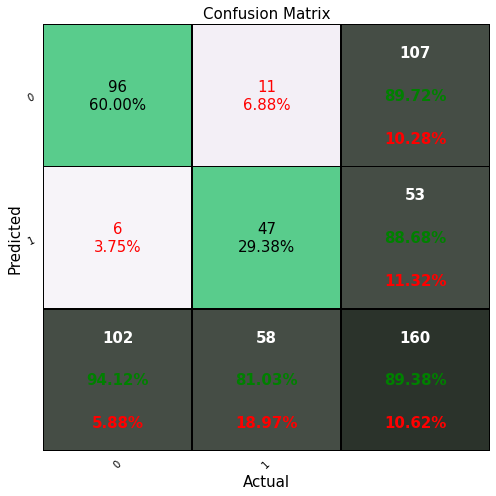

In [ ]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('black')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm[''] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc[''] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=15,
      lw=0.5, cbar=False, figsize=[7,7], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='black', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion Matrix', fontsize = 15)
    ax.set_xlabel(xlbl, fontsize = 15)
    ax.set_ylabel(ylbl, fontsize = 15)
    plt.tight_layout()  #set layout slim
    plt.show()

#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    array = np.array( [[96, 6,],
                       [11, 47]])
    #get pandas dataframe
    df_cm = DataFrame(array, index=range(0,2), columns=range(0,2))
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#



#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
    _test_cm()
    plt.pause(5)

In [ ]:
y_set1

NameError: ignored

In [ ]:
y_set1.reshape(-1,)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
y_set1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
y_set3.shape

(112,)

In [ ]:
y_set4.shape

(108,)

In [ ]:
y_set5.shape

(112,)